In [ ]:
import pandas as pd                                         #integrantes: Robert Reyes, Matias Troncoso, Nicolás Jara, Javier Bravo y Johann Villarroel
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
df1 = pd.read_csv("https://docs.google.com/spreadsheets/d/1muURgLuJnBJc1ip_lIWCV21Ew29L9Z4TWsM5C_qB3M8/export?format=csv")           #cargar base de datos tornados registrados desde 1950 hasta 2021 en EE.UU.

In [ ]:
df1                                                                                                                                 #se muestra la base de datos

#Columnas

#yr = año, mo = mes(1-12), dy = día(1-31,30 o 28 según corresponda), date= fecha
#st = estado donde se origino el tornado
#mag = Calificación F hasta enero de 2007; Clasificación EF después de enero de 2007 (-9 si se desconoce la clasificación)
#inj = Número de lesionados, fat = Número de victimas mortales
#slat = Latitud inicial en grados decimales
#slon = Longitud inicial en grados decimales
#elat = Latitud final en grados decimales (valor de 0 si falta)
#elon = Longitud final en grados decimales (valor de 0 si falta)
#len = Longitud de la vía en millas, wid = Ancho en yardas

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.100,-89.3,39.120,-89.23,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.770,-90.22,38.830,-90.03,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.880,-84.58,0.000,0.0,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.400,-94.37,0.000,0.0,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.170,-87.33,0.000,0.0,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,311.703,-833.804,311.805,-833.453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.690,-82.73,317.439,-825.412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,342.875,-857.878,342.998,-857.805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,337.372,-849.998,337.625,-849.633,2.75,150


In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].mean()                                                   #se calcula la media

yr     1991.341618
mo        5.976761
dy       15.921016
mag       0.691273
inj       1.437876
fat       0.090470
len       3.478340
wid     106.577030
dtype: float64

In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].median()                                              #se calcula la mediana

yr     1994.0
mo        6.0
dy       16.0
mag       1.0
inj       0.0
fat       0.0
len       0.8
wid      50.0
dtype: float64

In [ ]:
df1[["yr", "mo", "dy", "st", "mag", "inj", "fat", "len", "wid"]].mode()                                              #se calcula la moda

,yr,mo,dy,st,mag,inj,fat,len,wid
0,2004,5,24,TX,0,0,0,0.1,10


In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].std()                                                #se calcula la desviacion estandar


yr      19.330015
mo       2.438192
dy       8.736773
mag      1.283375
inj     18.263956
fat      1.484106
len      8.278775
wid    205.802676
dtype: float64

In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].quantile([0.25, 0.5, 0.75])                        #se calcula los cuartiles 25, 50 y 75

,yr,mo,dy,mag,inj,fat,len,wid
0.25,1976.0,4.0,8.0,0.0,0.0,0.0,0.10,20.0
0.50,1994.0,6.0,16.0,1.0,0.0,0.0,0.80,50.0
0.75,2008.0,7.0,24.0,1.0,0.0,0.0,3.13,100.0


In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].var()                                              #se calcula la varianza

yr       373.649493
mo         5.944780
dy        76.331195
mag        1.647052
inj      333.572106
fat        2.202570
len       68.538109
wid    42354.741309
dtype: float64

In [ ]:
rango_yr = df1["yr"].max() - df1["yr"].min()                                                                             #se calcula el rango
rango_mo = df1["mo"].max() - df1["mo"].min()
rango_dy = df1["dy"].max() - df1["dy"].min()
rango_mag = df1["mag"].max() - df1["mag"].min()
rango_inj = df1["inj"].max() - df1["inj"].min()
rango_fat = df1["fat"].max() - df1["fat"].min()
rango_len = df1["len"].max() - df1["len"].min()
rango_wid = df1["wid"].max() - df1["wid"].min()

# Imprime los resultados
print("Rango de año:       ", rango_yr)
print("Rango de mes:       ", rango_mo)
print("Rango de dia:       ", rango_dy)
print("Rango de magnitud:  ", rango_mag)
print("Rango de lecionados:", rango_inj)
print("Rango de fallecidos:", rango_fat)
print("Rango de distancia: ", rango_len)
print("Rango de ancho:     ", rango_wid)

Rango de año:        71
Rango de mes:        11
Rango de dia:        30
Rango de magnitud:   14
Rango de lecionados: 1740
Rango de fallecidos: 158
Rango de distancia:  234.7
Rango de ancho:      4576


In [ ]:
df1[["yr", "mo", "dy", "mag", "inj", "fat", "len", "wid"]].quantile([0.1, 0.2, 0.3 , 0.4, 0.5, 0.6 , 0.7, 0.8, 0.9 ])            #se calculan los percentiles

,yr,mo,dy,mag,inj,fat,len,wid
0.1,1962.0,3.0,4.0,0.0,0.0,0.0,0.10,10.0
0.2,1972.0,4.0,7.0,0.0,0.0,0.0,0.10,10.0
0.3,1980.0,5.0,10.0,0.0,0.0,0.0,0.20,20.0
0.4,1988.0,5.0,13.0,0.0,0.0,0.0,0.50,30.0
0.5,1994.0,6.0,16.0,1.0,0.0,0.0,0.80,50.0
0.6,2000.0,6.0,19.0,1.0,0.0,0.0,1.24,50.0
0.7,2005.0,7.0,22.0,1.0,0.0,0.0,2.30,90.0
0.8,2010.0,8.0,25.0,1.0,0.0,0.0,4.50,100.0
0.9,2016.0,10.0,28.0,2.0,1.0,0.0,9.10,250.0


In [ ]:
columna_cualitativa = 'st'
                                                                                                                      #se cambian la variable cualitativa de los nombres de los estados a una cuantitativa,
mapeo = {'AL': 1,'AK': 2, 'AZ': 3, 'AR': 4, 'CA': 5, 'CO': 6, 'CT': 7, 'DE': 8, 'FL': 9, 'GA': 10,                    #"AL" - Alabama, "AK" - Alaska, "AZ" - Arizona, "AR" - Arkansas, "CA" - California, "CO" - Colorado, "CT" - Connecticut, "DE" - Delaware, "FL" - Florida, "GA" - Georgia, "HI" - Hawái, "ID" - Idaho, "IL" - Illinois, "IN" - Indiana, "IA" - Iowa, "KS" - Kansas, "KY" - Kentucky, "LA" - Luisiana, "ME" - Maine, "MD" - Maryland, "MA" - Massachusetts, "MI" - Míchigan, "MN" - Minnesota, "MS" - Misisipi, "MO" - Misuri, "MT" - Montana, "NE" - Nebraska, "NV" - Nevada, "NH" - Nuevo Hampshire, "NJ" - Nueva Jersey, "NM" - Nuevo México, "NY" - Nueva York, "NC" - Carolina del Norte, "ND" - Dakota del Norte, "OH" - Ohio, "OK" - Oklahoma, "OR" - Oregón, "PA" - Pensilvania, "RI" - Rhode Island, "SC" - Carolina del Sur, "SD" - Dakota del Sur, "TN" - Tennessee, "TX" - Texas, "UT" - Utah, "VT" - Vermont, "VA" - Virginia, "WA" - Washington, "WV" - Virginia Occidental, "WI" - Wisconsin, "WY" - Wyoming.
'HI': 11, 'ID': 12, 'IL': 13, 'IN': 14, 'IA': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'ME': 19, 'MD': 20,
'MA': 21, 'MI': 22, 'MN': 23, 'MS': 24, 'MO': 25, 'MT': 26, 'NE': 27, 'NV': 28, 'NH': 29, 'NJ': 30,
'NM': 31, 'NY': 32, 'NC': 33, 'ND': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40,
'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VT': 45, 'VA': 46, 'WA': 47, 'WV': 48, 'WI': 49, 'WY': 50, 'PR':51,'VI':52,'DC':53}

df1[columna_cualitativa] = df1[columna_cualitativa].map(mapeo)



In [ ]:
df1

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,13,3,3,0,39.100,-89.3,39.120,-89.23,3.60,130
1,1950,1,3,1950-01-03,25,3,3,0,38.770,-90.22,38.830,-90.03,9.50,150
2,1950,1,3,1950-01-03,35,1,1,0,40.880,-84.58,0.000,0.0,0.10,10
3,1950,1,13,1950-01-13,4,3,1,1,34.400,-94.37,0.000,0.0,0.60,17
4,1950,1,25,1950-01-25,13,2,0,0,41.170,-87.33,0.000,0.0,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,10,1,0,0,311.703,-833.804,311.805,-833.453,2.19,150
67554,2021,12,30,2021-12-30,10,1,0,0,31.690,-82.73,317.439,-825.412,11.71,300
67555,2021,12,31,2021-12-31,1,1,0,0,342.875,-857.878,342.998,-857.805,0.95,50
67556,2021,12,31,2021-12-31,10,1,0,0,337.372,-849.998,337.625,-849.633,2.75,150


In [ ]:
df1 = df1.drop('date', axis=1)     #eliminamos la fila date

In [ ]:
df1['slon'] = pd.to_numeric(df1['slon'], errors='coerce')              #corregimos el tipo de datos de la columna slon y elon
df1['elon'] = pd.to_numeric(df1['elon'], errors='coerce')

df1['slon'] = df1['slon'].abs()                                        #cambiando datos negativos a positivos
df1['elon'] = df1['elon'].abs()

df1

,yr,mo,dy,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,13,3,3,0,39.100,89.300,39.120,89.230,3.60,130
1,1950,1,3,25,3,3,0,38.770,90.220,38.830,90.030,9.50,150
2,1950,1,3,35,1,1,0,40.880,84.580,0.000,0.000,0.10,10
3,1950,1,13,4,3,1,1,34.400,94.370,0.000,0.000,0.60,17
4,1950,1,25,13,2,0,0,41.170,87.330,0.000,0.000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,10,1,0,0,311.703,833.804,311.805,833.453,2.19,150
67554,2021,12,30,10,1,0,0,31.690,82.730,317.439,825.412,11.71,300
67555,2021,12,31,1,1,0,0,342.875,857.878,342.998,857.805,0.95,50
67556,2021,12,31,10,1,0,0,337.372,849.998,337.625,849.633,2.75,150


In [ ]:
for columna in df1.columns:                                                          #verificamos que tipo de datos tiene cada columna
    tipo_dato = df1[columna].dtype
    print(f"La columna {columna} tiene tipo de dato {tipo_dato}")

La columna yr tiene tipo de dato int64
La columna mo tiene tipo de dato int64
La columna dy tiene tipo de dato int64
La columna st tiene tipo de dato int64
La columna mag tiene tipo de dato int64
La columna inj tiene tipo de dato int64
La columna fat tiene tipo de dato int64
La columna slat tiene tipo de dato float64
La columna slon tiene tipo de dato float64
La columna elat tiene tipo de dato float64
La columna elon tiene tipo de dato float64
La columna len tiene tipo de dato float64
La columna wid tiene tipo de dato int64


In [ ]:
# Verificar los valores faltantes en el DataFrame df1                                                        #se eliminan la fila de los valores NULL del dataframe
print(df1.isnull().sum())

# Eliminar las filas con valores nulos
df1 = df1.dropna()

# Mostrar el DataFrame resultante sin valores nulos
print(df1)

yr        0
mo        0
dy        0
st        0
mag       0
inj       0
fat       0
slat      0
slon    557
elat      0
elon    662
len       0
wid       0
dtype: int64
         yr  mo  dy  st  mag  inj  fat     slat     slon     elat     elon  \
0      1950   1   3  13    3    3    0   39.100   89.300   39.120   89.230   
1      1950   1   3  25    3    3    0   38.770   90.220   38.830   90.030   
2      1950   1   3  35    1    1    0   40.880   84.580    0.000    0.000   
3      1950   1  13   4    3    1    1   34.400   94.370    0.000    0.000   
4      1950   1  25  13    2    0    0   41.170   87.330    0.000    0.000   
...     ...  ..  ..  ..  ...  ...  ...      ...      ...      ...      ...   
67553  2021  12  30  10    1    0    0  311.703  833.804  311.805  833.453   
67554  2021  12  30  10    1    0    0   31.690   82.730  317.439  825.412   
67555  2021  12  31   1    1    0    0  342.875  857.878  342.998  857.805   
67556  2021  12  31  10    1    0    0  337.372  84

In [ ]:
# Verificar los valores faltantes en el DataFrame df1
print(df1.isnull().sum())

yr      0
mo      0
dy      0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64


In [ ]:
df1

,yr,mo,dy,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,13,3,3,0,39.100,89.300,39.120,89.230,3.60,130
1,1950,1,3,25,3,3,0,38.770,90.220,38.830,90.030,9.50,150
2,1950,1,3,35,1,1,0,40.880,84.580,0.000,0.000,0.10,10
3,1950,1,13,4,3,1,1,34.400,94.370,0.000,0.000,0.60,17
4,1950,1,25,13,2,0,0,41.170,87.330,0.000,0.000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,10,1,0,0,311.703,833.804,311.805,833.453,2.19,150
67554,2021,12,30,10,1,0,0,31.690,82.730,317.439,825.412,11.71,300
67555,2021,12,31,1,1,0,0,342.875,857.878,342.998,857.805,0.95,50
67556,2021,12,31,10,1,0,0,337.372,849.998,337.625,849.633,2.75,150


In [ ]:
# Eliminar la columna irrelevante para la predicción ('inj') del DataFrame df1 y asignar el resultado a X
X = df1.drop('inj', axis=1)

# Asignar la columna 'inj' del DataFrame df1 a y
y = df1['inj']

# Dividir los datos en conjuntos de entrenamiento(80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Escalar los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo secuencial
model = Sequential()

# Agregar capas ocultas con 100 unidades y función de activación 'relu'
model.add(Dense(100, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))

# Agregar una capa de salida con una unidad y función de activación 'linear'
model.add(Dense(1, activation='linear'))

# Función de perdida custom para incrementar la penalidad por predicciones negativas
def penalty_mse(y_true, y_pred):
    negative_penalty = 100
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    loss += negative_penalty * tf.reduce_mean(tf.square(tf.nn.relu(-y_pred)))
    return loss

# Compilar el modelo con función de pérdida 'mean_squared_error', optimizador 'adam' y métrica 'mae'
model.compile(loss=penalty_mse, optimizer=Adam(learning_rate=0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Ajustar los hiperparámetros del entrenamiento
epochs = 100
batch_size = 50

# Entrenar el modelo con los conjuntos de entrenamiento y validar con los conjuntos de prueba
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluar el modelo en los datos de prueba
loss, mae = model.evaluate(X_test_scaled, y_test)
print('Loss:', loss)
print('Mean Absolute Error:', mae)

Epoch 1/100
856/856 [==============================] - 4s 3ms/step - loss: 234.2905 - root_mean_squared_error: 15.3016 - val_loss: 93.7807 - val_root_mean_squared_error: 9.6837
Epoch 2/100
856/856 [==============================] - 2s 2ms/step - loss: 176.5166 - root_mean_squared_error: 13.2801 - val_loss: 103.4793 - val_root_mean_squared_error: 10.1721
Epoch 3/100
856/856 [==============================] - 2s 2ms/step - loss: 180.6059 - root_mean_squared_error: 13.4343 - val_loss: 115.2418 - val_root_mean_squared_error: 10.7351
Epoch 4/100
856/856 [==============================] - 2s 2ms/step - loss: 177.1867 - root_mean_squared_error: 13.3075 - val_loss: 152.3403 - val_root_mean_squared_error: 12.3405
Epoch 5/100
856/856 [==============================] - 2s 3ms/step - loss: 177.1351 - root_mean_squared_error: 13.3034 - val_loss: 106.7953 - val_root_mean_squared_error: 10.3140
Epoch 6/100
856/856 [==============================] - 3s 3ms/step - loss: 171.1487 - root_mean_squared_err

In [ ]:
# Después de entrenar y evaluar el modelo...
# Crear un DataFrame vacío df2
# Guardar los valores predichos en el DataFrame df2
predicciones = model.predict(X_test_scaled)
df2 = pd.DataFrame()
df2['Valores_Predichos'] = predicciones.flatten()

# Imprimir el DataFrame df2 con los valores predichos
print(df2)
print('Cantidad de números negativos:', sum(df2['Valores_Predichos'] < 0))

418/418 [==============================] - 1s 1ms/step
       Valores_Predichos
0               0.241075
1               0.262497
2               0.185087
3               0.200385
4               0.265544
...                  ...
13364           0.207702
13365           0.867253
13366           0.163717
13367           0.250752
13368           0.983796

[13369 rows x 1 columns]
Cantidad de números negativos: 10


In [ ]:
df2.mean()                                       #se calcula la media de los valores predichos

Valores_Predichos    1.389291
dtype: float32

In [ ]:
df2.median()                                          #se calcula la mediana de los valores predichos

Valores_Predichos    0.239091
dtype: float32

In [ ]:
df2.mode()                                                 #se calcula la moda de los valores predichos

,Valores_Predichos
0,0.235226


In [ ]:
df2.std()                                                 #se calcula la desviacion estandar de los valores predichos

Valores_Predichos    15.343654
dtype: float32

In [ ]:
df2.quantile([0.25, 0.5, 0.75])                                 #se calcula la quintiles de los valores predichos

,Valores_Predichos
0.25,0.211774
0.50,0.239091
0.75,0.364240


In [ ]:
df2.var()                                                        #se calcula la varianza de los valores predichos

Valores_Predichos    235.427704
dtype: float32

In [ ]:
rango_1 = df2.max() - df2.min()                                     #se calcula el rango de los valores predichos

# Imprime los resultados
print("Rango de año:       ", rango_1)

Rango de año:        Valores_Predichos    824.866821
dtype: float32


In [ ]:
df2.quantile([0.1, 0.2, 0.3 , 0.4, 0.5, 0.6 , 0.7, 0.8, 0.9 ])            #se calcula los deciles de los valores predichos

,Valores_Predichos
0.1,0.188015
0.2,0.205375
0.3,0.217647
0.4,0.228530
0.5,0.239091
0.6,0.253176
0.7,0.278347
0.8,0.648258
0.9,1.437978


In [ ]:
# Calculo de la media de lesionados valores reales y predichos
media_lesionados_reales = df1['inj'].mean()
media_lesionados_predichos = df2['Valores_Predichos'].mean()

# Calculo de la desviacion tipica estandar valores reales y predichos
desviacion_real = df1['inj'].std()
desviacion_predichos = df2['Valores_Predichos'].std()

# Diferencia de medias
diferencia_medias = media_lesionados_reales - media_lesionados_predichos

# Calcular tamaño de la muestra para cada df
n1, n2 =len(df1), len(df2)

# Nivel de confianza de un 95%
confianza = 0.95

# Calcular el valor crítico de la distribución Z
valor_critico = norm.ppf((1 + confianza) / 2)

# Calcular el error estándar de la diferencia de medias
error_estandar = np.sqrt((desviacion_real**2 / n1) + (desviacion_predichos**2 / n2))

# Calcular el intervalo de confianza
intervalo_inferior = diferencia_medias - (valor_critico * error_estandar)
intervalo_superior = diferencia_medias + (valor_critico * error_estandar)

# Imprimir el intervalo de confianza
print('Distribuyendose de manera normal, usando la estadistica Z\n')
print("Intervalo de confianza (u1 - u2) con ({}%): [{} ; {}]".format(confianza * 100, intervalo_inferior, intervalo_superior))
print('Donde u1 corresponde a los datos reales y u2 a los predichos con respecto a los lesionados\n')
# Imprimir datos
print('Media lesionados datos reales: ',media_lesionados_reales)
print('Media lesionados datos predichos: ',media_lesionados_predichos)
print('Desviacion tipica estandar datos reales: ',desviacion_real)
print('Desviacion tipica estandar datos predichos: ',desviacion_predichos)
print('error estandar: {}'.format(error_estandar))




Distribuyendose de manera normal, usando la estadistica Z

Intervalo de confianza (u1 - u2) con (95.0%): [-0.2318757717951037 ; 0.35811423666551817]
Donde u1 corresponde a los datos reales y u2 a los predichos con respecto a los lesionados

Media lesionados datos reales:  1.4524101612758444
Media lesionados datos predichos:  1.3892909
Desviacion tipica estandar datos reales:  18.36060916614794
Desviacion tipica estandar datos predichos:  15.343654
error estandar: 0.15051042088384986


In [ ]:
# Crear el DataFrame 'df3' con los datos de 'y_test'
df3 = pd.DataFrame(y_test, columns=['inj'])
# Verificar el contenido de 'df3'
df3

,inj
47712,0.0
37379,0.0
32416,0.0
27261,0.0
47103,0.0
...,...
23127,0.0
38063,0.0
30227,0.0
17960,0.0


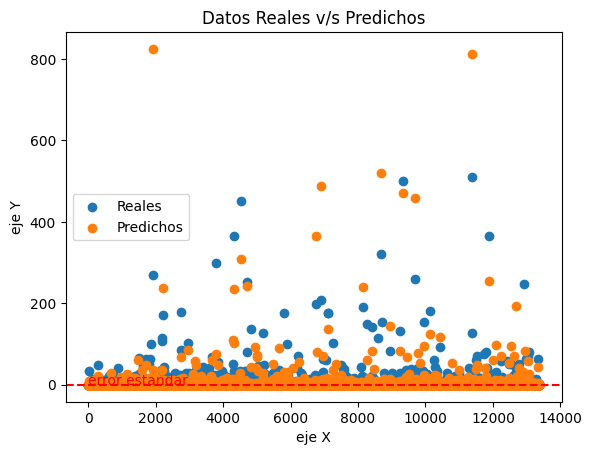

In [ ]:
# Obtener los valores de lesionados de df1 y df2
y1 = df3['inj'].values
y2 = df2['Valores_Predichos'].values

# Generar los valores de x (1, 2, 3, ..., n) según la longitud de y1 o y2
x = np.arange(1, len(y1) + 1)

# Graficar los valores
plt.scatter(x, y1, label="Reales")
plt.scatter(x, y2, label="Predichos")
plt.plot()

# Línea horizontal en y=error estandar de color rojo
plt.axhline(y=error_estandar, color='r', linestyle='--')
plt.text(1, error_estandar + 0.001, 'error estandar', color='r')  #línea horizontal

plt.xlabel("eje X")
plt.ylabel("eje Y")
# Establecer límites en el eje Y de 0 a 1.5
#plt.ylim(0, 100)
plt.title("Datos Reales v/s Predichos")
plt.legend()
plt.show()
